# Análisis Presupuesto Nacional 2020

El siguiente archivo tiene como propósito el análisis del documento de Presupuesto Nacional de Uruguay, presentado por el poder ejecutivo en el 2020, para ser presentado ante el poder Legislativo.

In [1]:
import os
from os import path
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Se lee el texto
presupuesto_or = open(path.join(d, 'presupuesto.txt'), encoding="utf8").read()

El siguiente es el texto completo del presupuesto en su formato original.

In [2]:
presupuesto_or

'Presupuesto Nacional\n    2020 - 2024\n\n\n\n\n   Proyecto de Ley\n\x0c\x0c                                     República Oriental del Uruguay\n                                    Ministerio de Economía y Finanzas\n\n\n\n\n                                       Proyecto de Ley\n                                            SECCIÓN I\n\n                                DISPOSICIONES GENERALES\n\n\nARTÍCULO 1.- El Presupuesto Nacional para el período de Gobierno 2020-2024 se regirá por las\ndisposiciones contenidas en la presente ley y los siguientes anexos, que forman parte integrante\nde esta: Tomo I "Resúmenes", Tomo II "Planificación y Evaluación", Tomo III "Gastos Corrientes e\nInversiones", Tomo IV "Recursos", Tomo V "Estructura de Cargos y Contratos de Función Pública".\n\n\nARTÍCULO 2.- Los créditos establecidos en la presente ley para gastos corrientes, inversiones,\nsubsidios y subvenciones están cuantificados a valores de 1º de enero de 2020 y se ajustarán en\nla forma dispuesta

In [3]:
presupuesto_lowcase = presupuesto_or.lower()

In [4]:
import nltk
nltk.download('wordnet')
nltk.download('omw')
from nltk.corpus import wordnet as wn
wn.synsets('bank')[0].lemma_names('spa')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\juanc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\juanc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!


['margen', 'orilla', 'vera']

In [5]:
nltk.download('stopwords')
es_stop = set(nltk.corpus.stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juanc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Se analizan las palabras más frecuentes dentro del presupuesto filtrando las "stop words", que son palbras de uso común que no agregan mucha información por si solas.

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

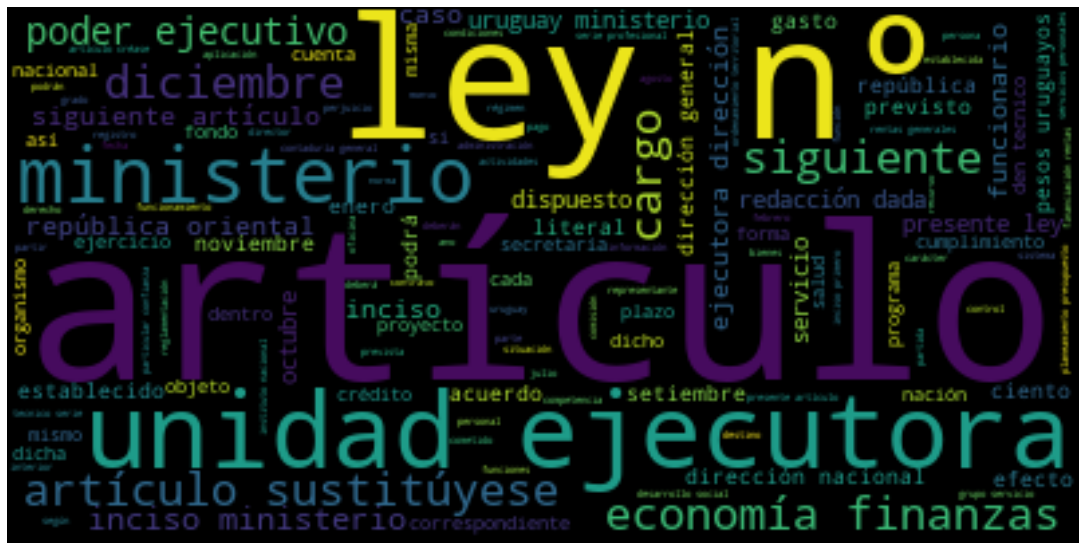

In [7]:
wordcloud = WordCloud(stopwords = es_stop,max_font_size=80).generate(presupuesto_lowcase)
plt.figure(figsize=(19.20,10.80))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Se agregan más palabras a la lista filtrada, para ver si queda luego de sacarlas, queda alguna palabra que pueda mostrar algo novedoso en el presupuesto.

In [8]:
new_stop_words =('artículo', 'ley' , 'n°', 'n °', 'nº', 'unidad', 'ejecutora', 'siguiente', 'sustitúyese', 'literal', 'república', 'oriental', 'podrá', 'cargo', 'misma', 'inciso', 'uruguay', 'poder', 'ministerio', 'presente', 'caso', 'establecido', 'dispuesto', 'previsto', 'nacional', 'redacción', 'ciento', 'plazo')
for i in new_stop_words:
    es_stop.add(i)

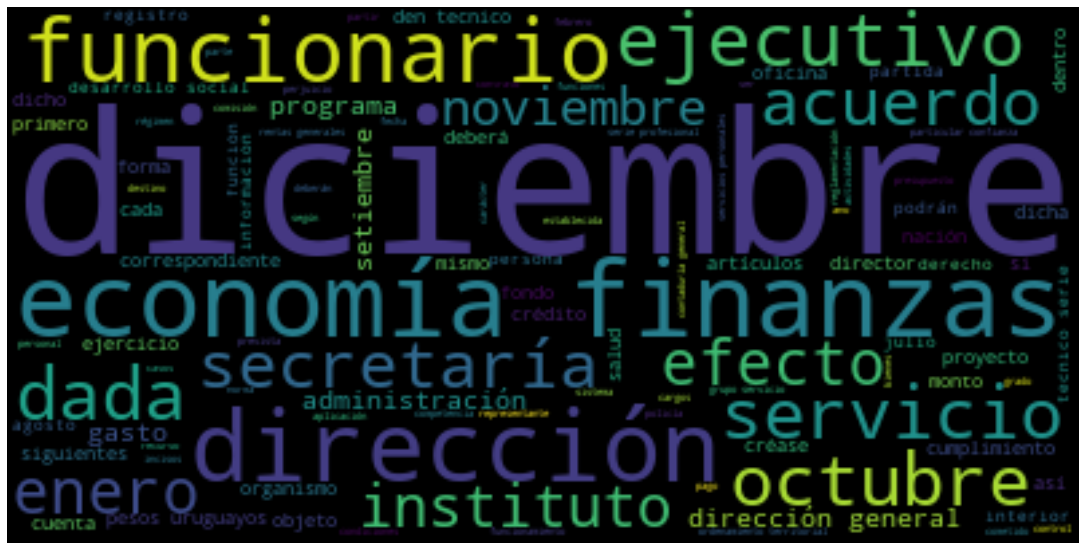

In [9]:
wordcloud = WordCloud(stopwords = es_stop,max_font_size=80).generate(presupuesto_lowcase)
plt.figure(figsize=(19.20,10.80))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
# restauro las stop words a las originales, menos algunas
es_stop = set(nltk.corpus.stopwords.words('spanish'))
new_stop_words =('artículo', 'ley' , 'n°', 'n °', 'nº', 'república', 'oriental', 'uruguay', 'poder', 'nacional', 'redacción', 'ciento', 'puede', 'inciso', 'unidad', 'incisos', 'literal', 'nación')
for i in new_stop_words:
    es_stop.add(i)

Utilizo spacy para tokenizar las palabras.

In [11]:
import spacy
spacy.load('es')
from spacy.lang.es import Spanish
parser = Spanish()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens
# nlp = spacy.load("es_core_news_sm")
# doc = nlp("presupuesto.txt")
# print([(w.text, w.pos_) for w in doc])

Utilizo nltk para lemmatizar

In [12]:
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

In [13]:
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

Tokenizo, lematizo y quito las stop words, también palabras de menos de cuatro caractéres. Queda una lista de palabras en minúsculas.

In [14]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in es_stop]
    tokens = [get_lemma(token) for token in tokens]
    tokens = [token for token in tokens if token not in es_stop]
    return tokens

In [15]:
presupuesto = prepare_text_for_lda(presupuesto_or)

Creo una función que busca la cantidad de veces que ocurre una palabra.

In [16]:
def contarpalabra(palabra):
    count = 0
    for i in presupuesto:
        if i == palabra:
            count += 1
            
    print("La palabra", palabra, "está presente", count, "veces")

Busco palabras claves que pueden tener relevancia en el presupuesto.

In [17]:
contarpalabra("ejecutivo")
contarpalabra("legislativo")
contarpalabra("judicial")
contarpalabra("virus")
contarpalabra("corona")
contarpalabra("pandemia")
contarpalabra("covid")
contarpalabra("covid-19")
contarpalabra("emergencia")
contarpalabra("sanitaria")
contarpalabra("pobreza")
contarpalabra("indigencia")
contarpalabra("empleo")
contarpalabra("seguridad")
contarpalabra("déficit")
contarpalabra("endeudamiento")
contarpalabra("ingresos")
contarpalabra("egesos")
contarpalabra("defensa")
contarpalabra("ejército")
contarpalabra("militares")
contarpalabra("salarios")
contarpalabra("sueldos")
contarpalabra("entes")
contarpalabra("públicos")
contarpalabra("educación")
contarpalabra("universidad")
contarpalabra("facultad")
contarpalabra("primaria")
contarpalabra("secundaria")
contarpalabra("infancia")
contarpalabra("niños")
contarpalabra("salud")
contarpalabra("narcotráfico")
contarpalabra("sindicatos")
contarpalabra("departamentos")
contarpalabra("departamental")
contarpalabra("descentralización")
contarpalabra("interior")
contarpalabra("montevideo")
contarpalabra("bancos")
contarpalabra("social")
contarpalabra("género")
contarpalabra("mujeres")
contarpalabra("ambiente")
contarpalabra("planta")
contarpalabra("celulosa")
contarpalabra("previsión")
contarpalabra("retiro")
contarpalabra("jubilaciones")
contarpalabra("derógase")

La palabra ejecutivo está presente 230 veces
La palabra legislativo está presente 5 veces
La palabra judicial está presente 15 veces
La palabra virus está presente 0 veces
La palabra corona está presente 0 veces
La palabra pandemia está presente 0 veces
La palabra covid está presente 1 veces
La palabra covid-19 está presente 1 veces
La palabra emergencia está presente 6 veces
La palabra sanitaria está presente 0 veces
La palabra pobreza está presente 1 veces
La palabra indigencia está presente 0 veces
La palabra empleo está presente 7 veces
La palabra seguridad está presente 88 veces
La palabra déficit está presente 1 veces
La palabra endeudamiento está presente 9 veces
La palabra ingresos está presente 19 veces
La palabra egesos está presente 0 veces
La palabra defensa está presente 36 veces
La palabra ejército está presente 3 veces
La palabra militares está presente 0 veces
La palabra salarios está presente 6 veces
La palabra sueldos está presente 4 veces
La palabra entes está presen

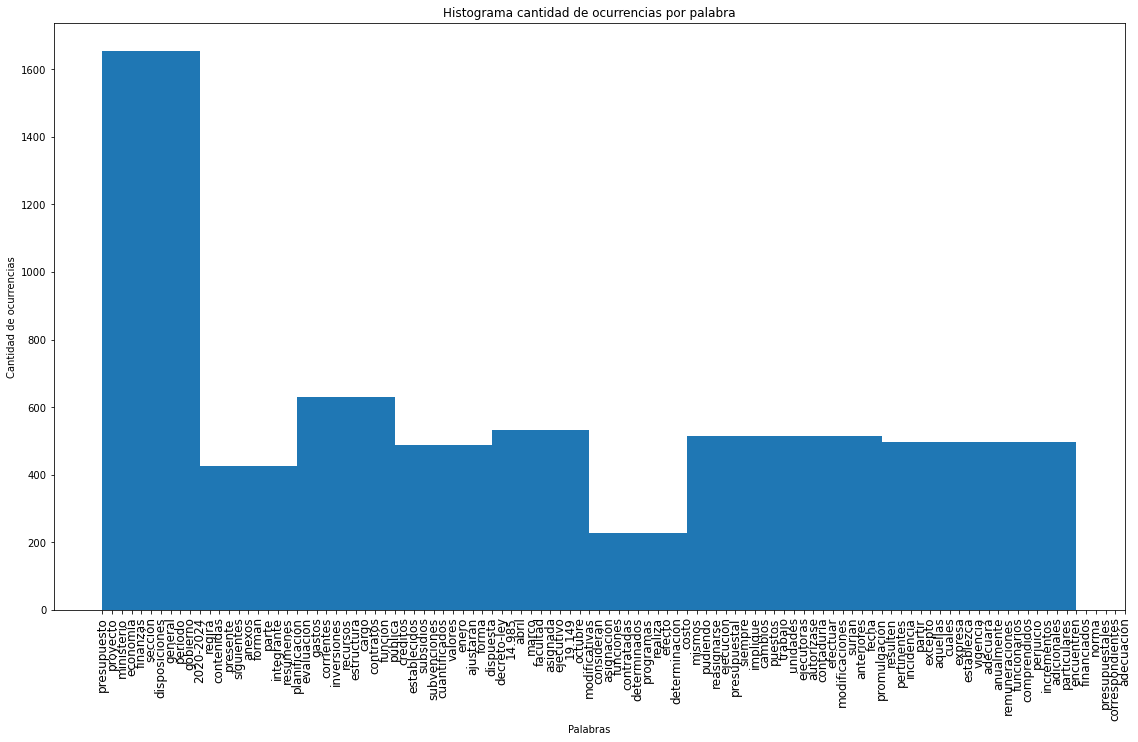

In [18]:
plt.figure(figsize=(19.20,10.80))
plt.xticks(rotation=90)
plt.hist(presupuesto, bins=[0, 10, 20, 30, 40, 50, 60, 80, 100]) 
plt.xticks(fontsize=12)
plt.title("Histograma cantidad de ocurrencias por palabra")
plt.ylabel('Cantidad de ocurrencias')
plt.xlabel('Palabras')
plt.show()

Como es de esperarse las palabras de mayor interés, que son las que más valor agregan para entender el tema tratado, no son las que mayor cantidad de veces aparecen en el documento.

Saco entonces más palabras para poder hacer un mejor análisis de los tópicos del documento.

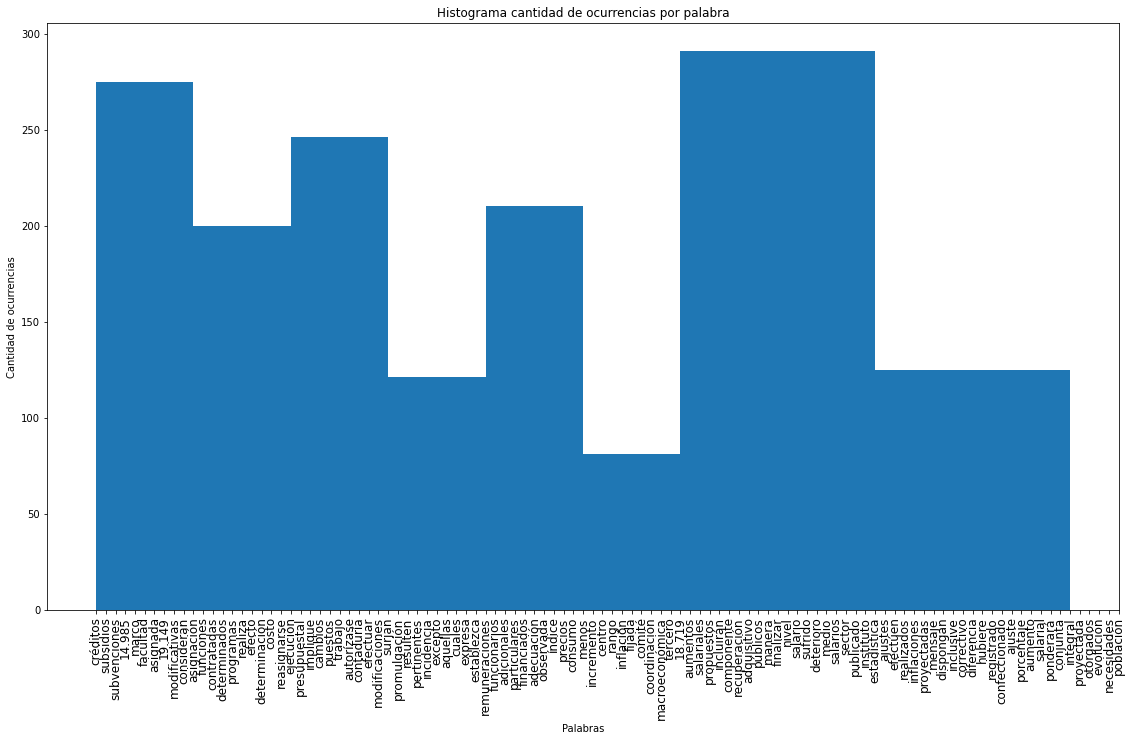

In [19]:
new_stop_words =('presupuesto', 'proyecto', 'ministerio', 'economía', 'finanzas', 'sección', 'disposiciones', 'general', 'período', 'gobienro', '2020-2024', 'vigencia', 'unidades', 'ejecutoras', 'adecuará', 'anualmente', 'determinará', 'previstas', 'variación', 'perjuicio', 'incrementos', 'diciembre', 'enero', 'programa', 'proyecto', 'deberá', 'deberán', 'me', 'octubre', 'podrán', 'planificación', 'evaluación', 'gastos', 'resúmenes', 'parte', 'integrante', 'corrientes', 'inversiones', 'recursos', 'estructura', 'gobierno', 'contenidas', 'anexos', 'presente', 'forman', 'cargo', 'proyectos', 'presupuestales', 'mismos', 'previo', 'primero', 'dentro', 'organismo', 'forma', 'cargo', 'público', 'setiembre', 'artículos', 'agosto', 'ejecutivo', 'tales', 'dicho', 'órgano', 'pública', 'siguientes', 'dispuesto', 'podrá', 'proyecto', 'siguientes', 'cargo', 'ejecutora', 'administración', 'establecido', 'funcionamiento', 'noviembre', 'total', 'ejercicio', 'general', 'julio', 'conforme', 'según', 'cualquier', 'previsto', 'prevista', 'anterior', 'siguiente', 'fecha', 'partidas', 'cargo', 'contratos', 'función', 'monto', 'abril', 'mes', 'sustitúyese', 'organismos', 'organismo', 'gestión', 'dirección', 'cuenta', 'régimen', 'oficina', 'constitución', 'cumplimiento', 'regirá', 'otorgado', 'concepto', 'establecidos', 'vigente', 'consideración', 'tomando', 'encuentren', 'literales', 'efectos', 'plazo', 'casos', 'norma', 'correspondientes', 'partir', 'servicios', 'cuantificados', 'valores' , 'dichos', 'corresponda', 'siempre', 'persona', 'incluir', 'mismo', 'misma', 'pudiendo', 'poder', 'cincuenta', 'treinta', 'cuarenta', 'cinco', 'directorio', 'ajustarán', 'dispuesta', 'sesenta', 'cualquiera', 'ochenta', 'dicha', 'dichas', 'equivalente', 'salvo', 'establecida', 'segundo', 'anteriores', 'resolución', 'carácter', 'asimismo', 'criterios', 'precedente', 'través', 'realizar', 'comprendidos', 'correspondiente', 'mediante', 'presupuestos', 'planeamiento', 'créase', 'primer', 'posea', 'anuales', 'decreto-ley', 'favorable')
for i in new_stop_words:
    es_stop.add(i)
    
presupuesto_or = open(path.join(d, 'presupuesto.txt'), encoding="utf8").read()
presupuesto = prepare_text_for_lda(presupuesto_or)

plt.figure(figsize=(19.20,10.80))
plt.xticks(rotation=90)
plt.hist(presupuesto, bins=[0, 10, 20, 30, 40, 50, 60, 80, 100]) 
plt.xticks(fontsize=12)
plt.title("Histograma cantidad de ocurrencias por palabra")
plt.ylabel('Cantidad de ocurrencias')
plt.xlabel('Palabras')
plt.show()

Latent Direct Allocation es una técnica para modelar temas tratados en un documento. Ayuda a descubrir estructuras semánticas.

In [21]:
from gensim import corpora
presupuesto = [d.split() for d in presupuesto]
dictionary = corpora.Dictionary(presupuesto)
corpus = [dictionary.doc2bow(text) for text in presupuesto]

In [22]:
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [23]:
import gensim
canttopics = 6
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = canttopics, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.048*"social" + 0.018*"transferencias" + 0.017*"lineamientos" + 0.015*"reciban" + 0.015*"excepcionales"')
(1, '0.046*"retribución" + 0.020*"acuerdo" + 0.019*"competencia" + 0.017*"indexadas" + 0.017*"contar"')
(2, '0.024*"salud" + 0.023*"informe" + 0.016*"solicitar" + 0.015*"mayoría" + 0.015*"económico"')
(3, '0.018*"directores" + 0.016*"veinte" + 0.016*"subsidios" + 0.016*"secretaría" + 0.016*"excepción"')
(4, '0.023*"instituto" + 0.021*"entidades" + 0.021*"públicas" + 0.020*"públicos" + 0.016*"naturaleza"')
(5, '0.029*"millones" + 0.025*"bienes" + 0.025*"personales" + 0.022*"créditos" + 0.020*"peso"')


Para visualizar los topicos se utiliza pyLDAvis.

In [24]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

In [25]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

Saliency, la saliencia, es la medida de cuanto un término, explica el tópico en cuestión.

Relevance, la relevancia, es un promedio ponderado de la probabilidad de la palabra dadados el topico  y la palanbra, y el topico normalizado por la probabilidad del tópico.

El tamaño de la burbuja muestra la importancia de los tópicos, en relación a los datos.

Los términos más salientes, son los que más nos cuentan sobre lo que está pasando en cada tópico.

Algunos tópicos se encuentran en clusters, lo que indíca que son similares entre si.

Fuentes conultadas:
- https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21
- https://radimrehurek.com/gensim/auto_examples/core/run_core_concepts.html